# AlexNet

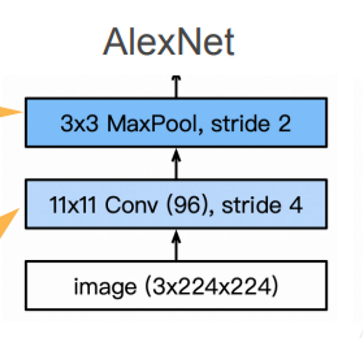 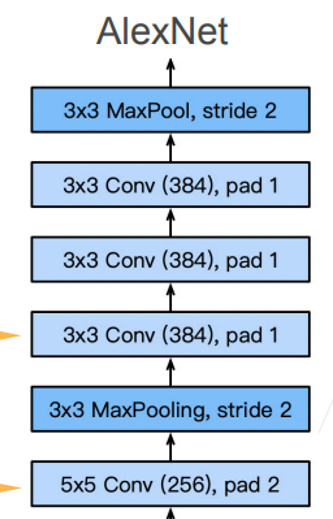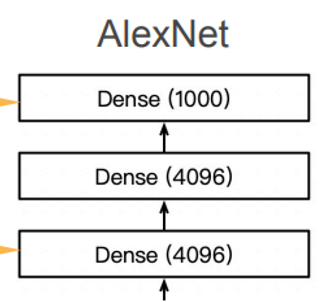

## AlexNet网络的实现

In [31]:
import torch
from torch import nn
from d2l import torch as d2l
from Fashion_MNIST_09 import load_data_fashion_mnist


#这里数据集用的是FashionMNIST,输入通道数是1，在ImageNet上面输入通道数应该是3
net = nn.Sequential(
    nn.Conv2d(1, 96, kernel_size=11, stride=4, padding=1), nn.ReLU(),
    nn.MaxPool2d(kernel_size=3, stride=2),
    nn.Conv2d(96, 256, kernel_size=5, padding=2), nn.ReLU(),
    nn.MaxPool2d(kernel_size=3, stride=2),
    nn.Conv2d(256, 384, kernel_size=3, padding=1), nn.ReLU(),
    nn.Conv2d(384, 384, kernel_size=3, padding=1), nn.ReLU(),
    nn.Conv2d(384, 256, kernel_size=3, padding=1), nn.ReLU(),
    nn.MaxPool2d(kernel_size=3, stride=2), nn.Flatten(),
    nn.Linear(6400, 4096), nn.ReLU(), nn.Dropout(p=0.5),
    nn.Linear(4096, 4096), nn.ReLU(), nn.Dropout(p=0.5),
    nn.Linear(4096, 10))

In [27]:
##我们构造一个 单通道数据，来观察每一层输出的形状
X = torch.randn(1, 1, 224, 224)
for layer in net:
    X = layer(X)
    print(layer.__class__.__name__, 'Output shape:\t', X.shape)

Conv2d Output shape:	 torch.Size([1, 96, 54, 54])
ReLU Output shape:	 torch.Size([1, 96, 54, 54])
MaxPool2d Output shape:	 torch.Size([1, 96, 26, 26])
Conv2d Output shape:	 torch.Size([1, 256, 26, 26])
ReLU Output shape:	 torch.Size([1, 256, 26, 26])
MaxPool2d Output shape:	 torch.Size([1, 256, 12, 12])
Conv2d Output shape:	 torch.Size([1, 384, 12, 12])
ReLU Output shape:	 torch.Size([1, 384, 12, 12])
Conv2d Output shape:	 torch.Size([1, 384, 12, 12])
ReLU Output shape:	 torch.Size([1, 384, 12, 12])
Conv2d Output shape:	 torch.Size([1, 256, 12, 12])
ReLU Output shape:	 torch.Size([1, 256, 12, 12])
MaxPool2d Output shape:	 torch.Size([1, 256, 5, 5])
Flatten Output shape:	 torch.Size([1, 6400])
Linear Output shape:	 torch.Size([1, 4096])
ReLU Output shape:	 torch.Size([1, 4096])
Dropout Output shape:	 torch.Size([1, 4096])
Linear Output shape:	 torch.Size([1, 4096])
ReLU Output shape:	 torch.Size([1, 4096])
Dropout Output shape:	 torch.Size([1, 4096])
Linear Output shape:	 torch.Size([1,

## 训练

In [32]:
#Fashion-MNIST图像的分辨率 低于ImageNet图像。 我们将它们增加到 224×224
batch_size = 128
train_iter, test_iter = load_data_fashion_mnist(batch_size, resize=224)

loss 0.329, train acc 0.880, test acc 0.885
2699.1 examples/sec on cuda:0


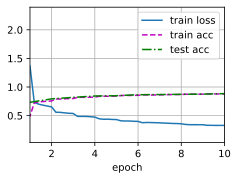

In [35]:
lr, num_epochs = 0.01, 10
d2l.train_ch6(net, train_iter, test_iter, num_epochs, lr, d2l.try_gpu())
#这个错是num_worker的事情

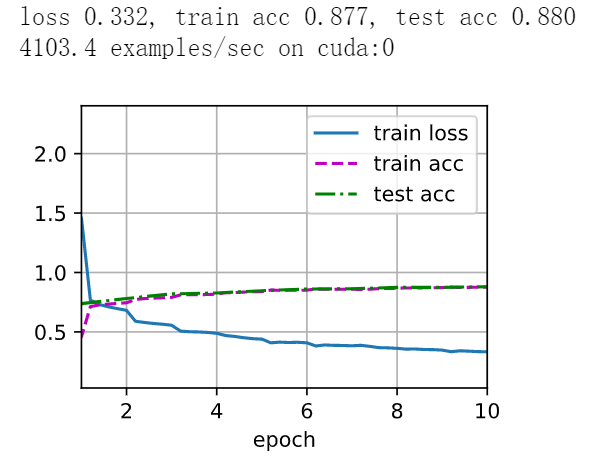

# 答疑

- 学习率低训练时比较慢的
- CNN找到的特征根本没考虑到人，目标就是选取特征使得最后一层的分类，优化最后这个目标，优化根本没考虑人，人能读懂是碰巧，CNN不知道人的存在。深度学习的可解释性确实很差
- 网络的设计思想以及为什么这么想，确实不太好说
- 砍掉一个4096的全连接层效果比较差，因为卷积层提取的特征抽的不够好，不够深
- 加多的数据增强变差不是一个很奇怪的事情
- 神经网络没有什么特别是新的，只是会包装。如何宣传工作非常重要。
- resize是保证高宽比之后，再在里面扣一块方形的出来。